CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


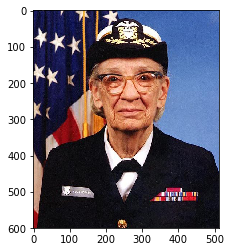

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib
import numpy as np
from cvxpy import *
%time
%matplotlib inline

image_file = cbook.get_sample_data('grace_hopper.png')
X_orig = plt.imread(image_file)
plt.imshow(X_orig)

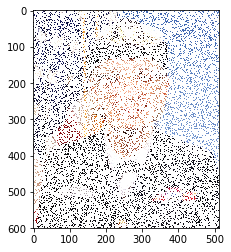

In [2]:
#Corrupt the image by deleting random pixels

rows, cols, colors = X_orig.shape
K = (np.random.rand(rows,cols) < .2).astype(int)

X_corr = np.ones((rows,cols,colors))
X_corr[K==1,:] = X_orig[K==1,:]
plt.imshow(X_corr)

In [3]:
#Image Recovery

variables = []
constr = []
for i in range(colors):
    X = Variable(rows, cols)
    variables += [X]
    constr += [mul_elemwise(K, X - X_corr[:, :, i]) == 0]

prob = Problem(Minimize(tv(*variables)), constr)
prob.solve(solver=SCS)

WARN: A->p (column pointers) not strictly increasing, column 307199 empty
WARN: A->p (column pointers) not strictly increasing, column 614399 empty
WARN: A->p (column pointers) not strictly increasing, column 921599 empty


13731.778802629571

In [4]:
X_rec = np.zeros((rows,cols,3))
for i,var in enumerate(variables):
    X_rec[:,:,i] = var.value

RECOVERED IMAGE FROM CORRUPTED


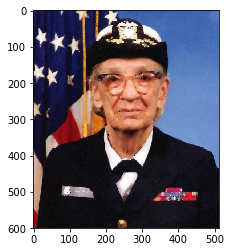

In [5]:
print("RECOVERED IMAGE FROM CORRUPTED")
plt.imshow(X_rec)

ORIGINAL IMAGE


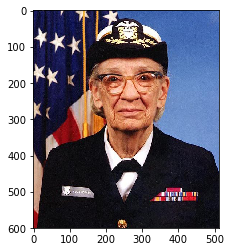

In [6]:
print("ORIGINAL IMAGE")
plt.imshow(X_orig)